<h1> Sai Krishna
<h1>PH22MSCST11003

<h1> Question 1
    <h4>In 1919, two expeditions sailed from Britain to test if the light deflection
from stars agrees with Einstein’s General Theory of Relativity. Einstein’s
theory predicts a value of 1.74 arc-seconds, whereas Newtonian gravity
predicts a value exactly half of that. The team by Eddington obtained a
value of 1.61 ± 0.40 arc-seconds, while the team by Crommelin reported a

value of 1.98 ± 0.16 arc-seconds. Calculate the Bayes factor between Gen-
eral Relativity and Newtonian gravity from those data, assuming Gaussian

likelihoods.

In [2]:
import math

def gaussian_pdf(x, mean, std_dev):
    return (1 / (math.sqrt(2 * math.pi) * std_dev)) * math.exp(-((mean - x) ** 2) / (2 * std_dev ** 2))

mean_observed = 1.61
std_dev_observed = 0.40
mean_data_1 = 1.98
std_dev_data_1 = 0.16
mean_hypothesis_1 = 1.74
mean_hypothesis_2 = 0.87

likelihood_hypothesis_1 = gaussian_pdf(mean_observed, mean_hypothesis_1, std_dev_observed) * gaussian_pdf(mean_data_1, mean_hypothesis_1, std_dev_data_1)
likelihood_hypothesis_2 = gaussian_pdf(mean_observed, mean_hypothesis_2, std_dev_observed) * gaussian_pdf(mean_data_1, mean_hypothesis_2, std_dev_data_1)

bayes_factor = likelihood_hypothesis_1 / likelihood_hypothesis_2
print("Bayes factor:", bayes_factor)


Bayes factor: 48164622958.341805


<h3>Question 2
    <h4>For exercise 1 in arXiv:1008.4686, calculate the 68% and 95% joint confi-
dence intervals on b and m.

(Hint : Either use emcee followed by plot mcmc code in astroML.plotting
or use the corner module. Alternately, use the techniques of linear algebra
and using the example shown in class during the discussion on frequentist
analysis)

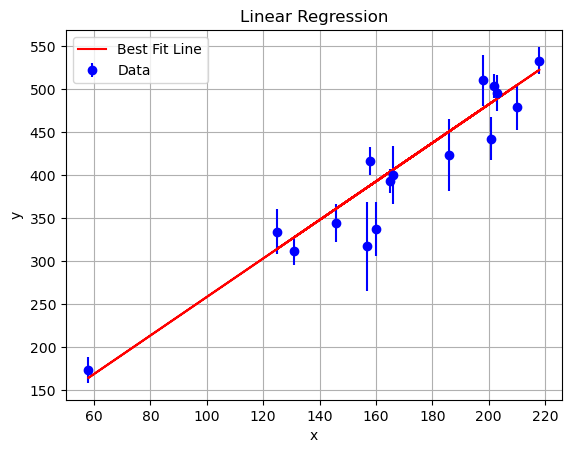

Best-fit parameters:
m = 2.24 ± 0.12
b = 34.05 ± 21.08
Confidence Intervals for m:
68% Confidence Interval: 2.12 to 2.36
95% Confidence Interval: 1.99 to 2.49

Confidence Intervals for b:
68% Confidence Interval: 12.97 to 55.12
95% Confidence Interval: -8.11 to 76.20


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def line_model(x, m, b):
    return m * x + b

x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
sigma_y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

popt, pcov = curve_fit(line_model, x, y, sigma=sigma_y)
m_fit, b_fit = popt
m_err, b_err = np.sqrt(np.diag(pcov))

plt.errorbar(x, y, yerr=sigma_y, fmt='o', color='b', label='Data')
plt.plot(x, line_model(x, m_fit, b_fit), color='r', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression')
plt.grid(True)
plt.show()

print(f"Best-fit parameters:")
print(f"m = {m_fit:.2f} ± {m_err:.2f}")
print(f"b = {b_fit:.2f} ± {b_err:.2f}")

m_lower_68 = m_fit - m_err
m_upper_68 = m_fit + m_err
m_lower_95 = m_fit - 2 * m_err
m_upper_95 = m_fit + 2 * m_err
b_lower_68 = b_fit - b_err
b_upper_68 = b_fit + b_err
b_lower_95 = b_fit - 2 * b_err
b_upper_95 = b_fit + 2 * b_err

print("Confidence Intervals for m:")
print(f"68% Confidence Interval: {m_lower_68:.2f} to {m_upper_68:.2f}")
print(f"95% Confidence Interval: {m_lower_95:.2f} to {m_upper_95:.2f}")
print("\nConfidence Intervals for b:")
print(f"68% Confidence Interval: {b_lower_68:.2f} to {b_upper_68:.2f}")
print(f"95% Confidence Interval: {b_lower_95:.2f} to {b_upper_95:.2f}")


<h3>Question 3<h4>Fit the data in Table 1 of arXiv:1008.4686 to a straight line, after including
all the data points, (after ignoring σx and ρxy) using both maximum
likelihood analysis and using a Bayesian analysis to identify the outliers,
using the same procedure as in the second of Jake VanDerPlas blog article.
Show graphically the best fit line using both maximum likelihood analysis
and also using Bayesian analysis, including the outlier points.

<ErrorbarContainer object of 3 artists>

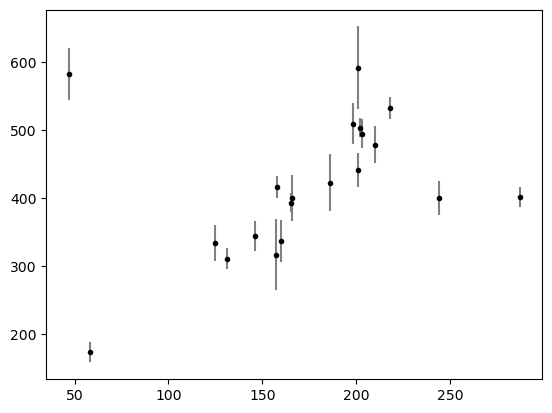

In [36]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

data = np.array([
[201, 592, 61],
[244, 401, 25],
[47, 583, 38],
[287, 402, 15],
[203, 495, 21],
[58, 173, 15],
[210, 479, 27],
[202, 504, 14],
[198, 510, 30],
[158, 416, 16],
[165, 393, 14],
[201, 442, 25],
[157, 317, 52],
[131, 311, 16],
[166, 400, 34],
[160, 337, 31],
[186, 423, 42],
[125, 334, 26],
[218, 533, 16],
[146, 344, 22]
])
x = data[:, 0]
y = data[:, 1]
e = data[:, 2]
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')

Optimization terminated successfully.
         Current function value: 144.981861
         Iterations: 113
         Function evaluations: 211


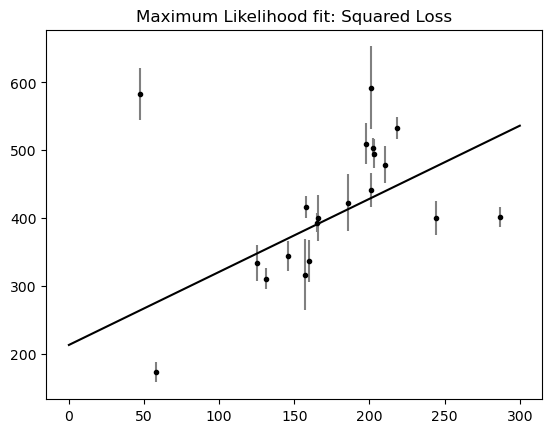

In [38]:
from scipy import optimize
def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)
theta1 = optimize.fmin(squared_loss, [0, 0], disp=True)
xfit = np.linspace(0, 300)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
plt.title('Maximum Likelihood fit: Squared Loss');

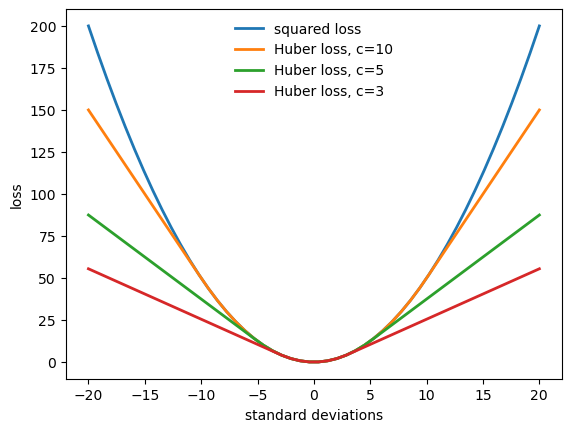

In [39]:
t = np.linspace(-20, 20)
def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2+ (abs(t) >= c) * -c * (0.5 * c - abs(t)))
plt.plot(t, 0.5 * t ** 2, label="squared loss", lw=2)
for c in (10, 5, 3):
    plt.plot(t, huber_loss(t, c), label="Huber loss, c={0}".format(c),lw=2)
plt.ylabel('loss')
plt.xlabel('standard deviations')
plt.legend(loc='best', frameon=False)

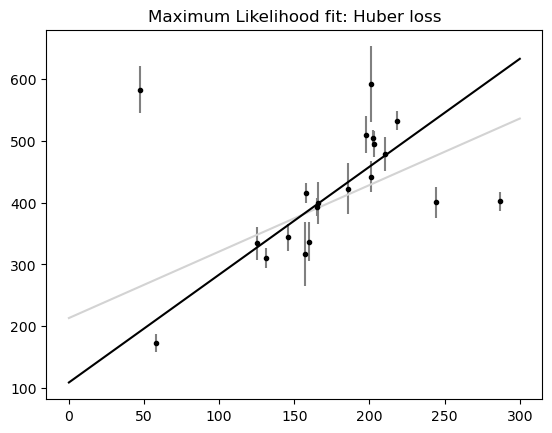

In [40]:
def total_huber_loss(theta, x=x, y=y, e=e, c=3):
    return huber_loss((y - theta[0] - theta[1] * x) / e, c).sum()
theta2 = optimize.fmin(total_huber_loss, [0, 0], disp=False)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='black')
plt.title('Maximum Likelihood fit: Huber loss');

/tmp/ipykernel_21691/1242972259.py:11: RuntimeWarning: divide by zero encountered in log
  logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) -0.5 * (dy / sigma_B) ** 2
/tmp/ipykernel_21691/1242972259.py:10: RuntimeWarning: divide by zero encountered in log
  logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy /e) ** 2


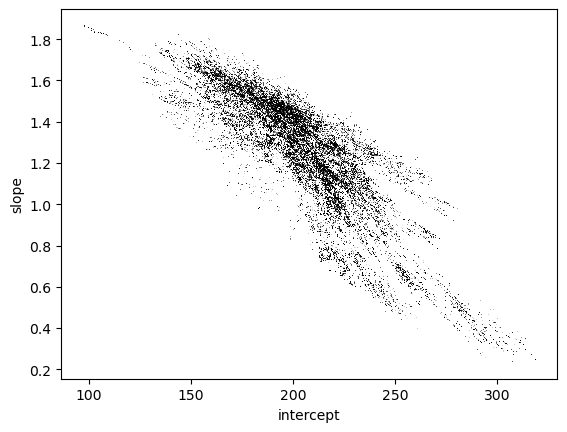

In [41]:
def log_prior(theta):

    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf # recall log(0) = -inf
def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1) 
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy /e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) -0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))
def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

ndim = 2 + len(x)
nwalkers = 50
nburn = 10000 
nsteps = 15000 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim -2))
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior,args=[x, y, e, 250])
sampler.run_mcmc(starting_guesses, nsteps)
sample = sampler.chain # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope');

In [42]:
pip install emcee

Note: you may need to restart the kernel to use updated packages.


g1 mean: 0.49
g2 mean: 0.39


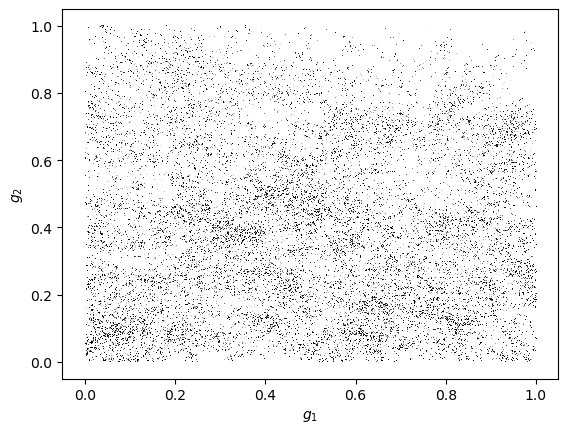

In [43]:
plt.plot(sample[:, 2], sample[:, 3], ',k', alpha=0.1)
plt.xlabel('$g_1$')
plt.ylabel('$g_2$')
print("g1 mean: {0:.2f}".format(sample[:, 2].mean()))
print("g2 mean: {0:.2f}".format(sample[:, 3].mean()))

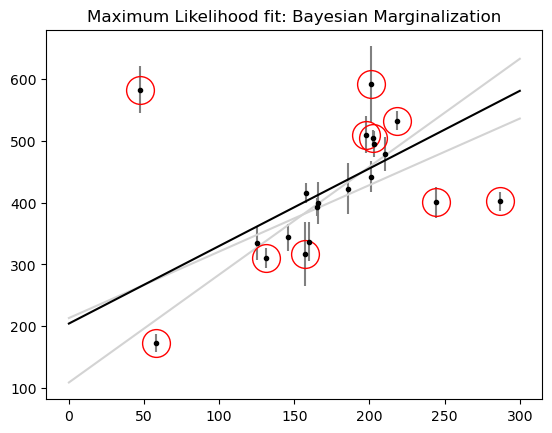

In [44]:
theta3 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='lightgray')
plt.plot(xfit, theta3[0] + theta3[1] * xfit, color='black')
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mfc='none', mec='red')
plt.title('Maximum Likelihood fit: Bayesian Marginalization');